# Grover's algorithm explained

All the simple examples of the Groover algorithm are not for searching the set, but for amplification of the amplitude probability for the already known state. The real purpose of the Groover algorithm is to find a solution according to known input states using the functions. The advantage is that it is done withuot checking all the elements one by one, but using the superposition of states checking all of them at once.
It will not be useful for database search where we want to find an index holding the desired value. It is that we need to know to know the whole quantum state to desing the oracle.

Moreover the function should be prepared as it returns 1 only for one of all the possilbe states (only one solution) all other states must return 0. So if the problem has multiple solution (find all odd states) the Grover algorith is not suitable for this task. Desiging the function (oracle), you have to be sure that it will return only one solution (!).

It could be useful when all the below conditions are met:

    - there is only one solution of the problem
    - the solution can be computed using the input state
    - the result of the algo is the state that meets the function conditions.

It colud be usefull when you don't know the solution, but know the requirements it have to met.
For the database search it wolud be useful when:

    - all the data are loaded into one entglament state 

It is even not enough to the pattern on the part of the qubits form the full state. Eg. When you would like to make te state address+value, and do the pattern only for the value part. Your pattern have to point the whole qubit state.

Grover search is algorithm used for searching a solution among many possible candidates using Quantum Computers.
**The Grover’s algorithm is not intended to ﬁnd an element in a database, its purpose is searching through a function inputs to check whether the function returns true for a particular input.** [2]


Grover's algorithm does not have an advantage when searching an unordered database, because encoding the oracle into a circuit requires Ω~(n) operations. You can prove this with a simple circuit counting argument. If the circuit had size O(n0.99) then there would be fewer distinct circuits than distinct oracles. So the actual operational complexity is Ω~(n1.5), even though the query complexity is O(n0.5).Grover's algorithm only has an advantage when the thing you are searching over is abstract, like possible solutions to a SAT problem, as opposed to literally stored in hardware somewhere, like a database. [3]

Like all quantum computer algorithms, Grover's algorithm is probabilistic, in the sense that it gives the correct answer with high probability. The probability of failure can be decreased by repeating the algorithm. [4]


The procedure for the Groover's algorithm is as follows:

1. Design the pattern (gate set) for the quantum state that marks the desired states (Oracle).
2. Start the iteration

    1. Set all the qubits into the superpostions state.
    2. Apply the Oracle for the circuit and save the outcome in the Oracle's ancilla qubit.
    3. Revert the pattern from the circuit - reverse the quantum circuit, that applied the pattern.
    4. Amplify amplitude the states thanks to phase kick back 

5. Repeat the steps from 2 to 4.


## "Search the state"

We will use the ancilla bit aproach. It will give the phase kick back to the desierd state, that will be amplified.

In [16]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.tools.visualization import plot_histogram

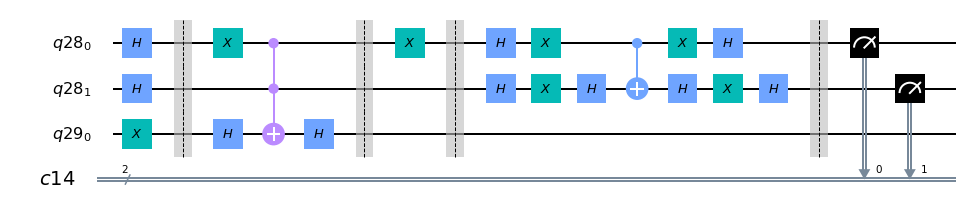

In [35]:
state = QuantumRegister(2)
stateb = ClassicalRegister(2) # bits for states measurements
ancilla = QuantumRegister(1)  # auxiliary variable
circ = QuantumCircuit()
circ.add_register(state, stateb, ancilla)

# 1. step - Prepartion
circ.x(ancilla)  # X on ancilla qbit
circ.h(state) # Put the state qubits into superpostion of states
circ.barrier() # added for circuit readability
# Iteration:

for i in range(1): # Only one iteration for this example is enough, more iteration will destroy the solution
    # 2. apply Oracle
    circ.x(state[0]) # for detecting the state 01 -> 11
    # store result in ancilla
    circ.h(ancilla)
    circ.ccx(state[0], state[1], ancilla) # 11 -> 1
    circ.h(ancilla)
    circ.barrier() # added for circuit readability

    # 3. If neccessary revert all operation from the oracle, that modified other qubits 
    circ.x(state[0]) 
    circ.barrier() # added for circuit readability

    # 4. Amplify the amplitude
    # inversion_about_average
    circ.h(state)
    circ.x(state)

    circ.h(state[1])
    circ.cx(state[0], state[1])
    circ.h(state[1])

    circ.x(state[0:2])
    circ.h(state[0:2])
    circ.barrier() # added for circuit readability

circ.measure(state, stateb)
circ.draw(output='mpl')


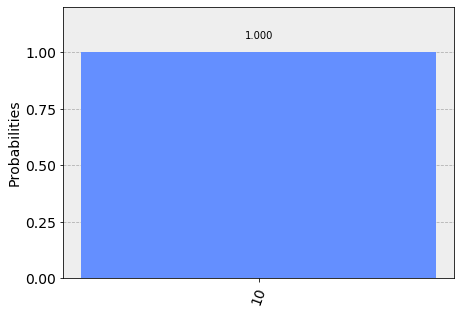

In [36]:
# Run the program
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend=backend, shots=1024)
st = job.result().get_counts()
plot_histogram(st)


As we see only the state 10 was amplified.

## Search for staes witt only odd 1
Not possible it searches only for one solution.

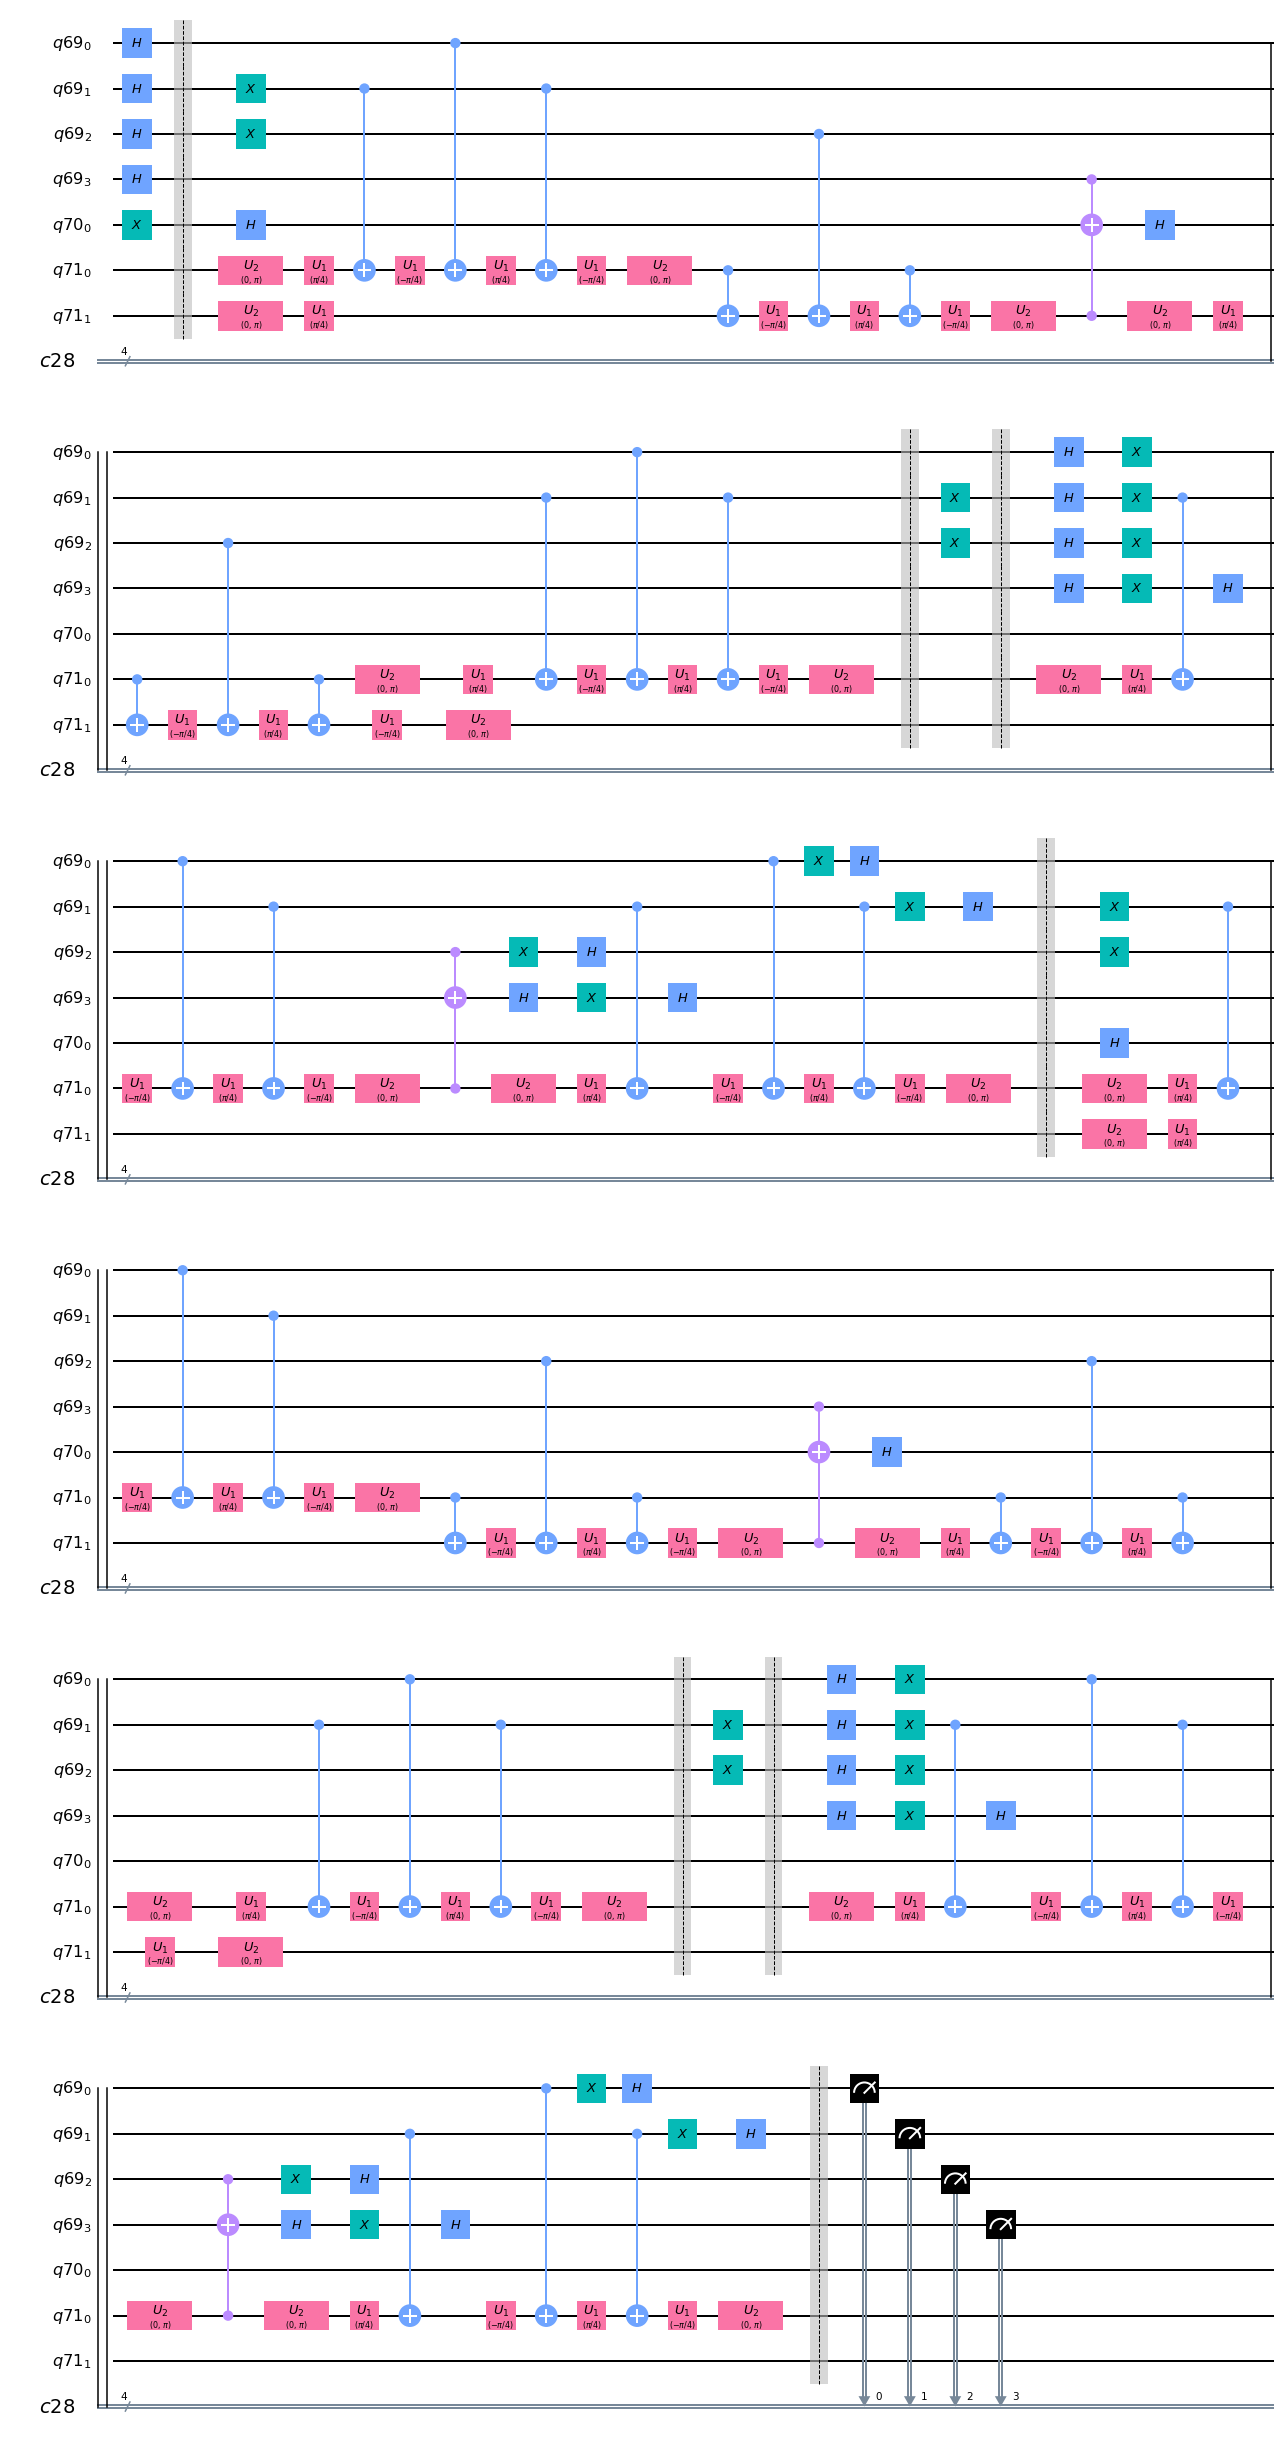

In [57]:
state = QuantumRegister(4)
stateb = ClassicalRegister(4) # bits for states measurements
ancilla = QuantumRegister(1)  # auxiliary variable
tmp = QuantumRegister(2)  # for the apmplification mct gate
circ = QuantumCircuit()
circ.add_register(state, stateb, ancilla, tmp)

# 1. step - Prepartion
circ.x(ancilla)  # X on ancilla qbit
circ.h(state) # Put the state qubits into superpostion of states
circ.barrier() # added for circuit readability
# Iteration:

for i in range(2): # Only one iteration for this example is enough, more iteration will destroy the solution
    # 2. apply Oracle
    circ.x(state[1])
    circ.x(state[2])
    # store result in ancilla
    circ.h(ancilla)
    circ.mct([state[0], state[1], state[2], state[3]], ancilla[0], tmp, mode = 'basic')
    circ.h(ancilla)
    circ.barrier() # added for circuit readability

    # 3. Revert all operation from the oracle, that modified other qubits  (revers order)
    circ.x(state[2])
    circ.x(state[1])
    circ.barrier() # added for circuit readability

    # 4. Amplify the amplitude
    # inversion_about_average
    circ.h(state)
    circ.x(state)

    circ.h(state[3])
    circ.mct([state[0], state[1], state[2]], state[3], tmp)
    circ.h(state[3])

    circ.x(state)
    circ.h(state)
    circ.barrier() # added for circuit readability

circ.measure(state, stateb)
circ.draw(output='mpl')


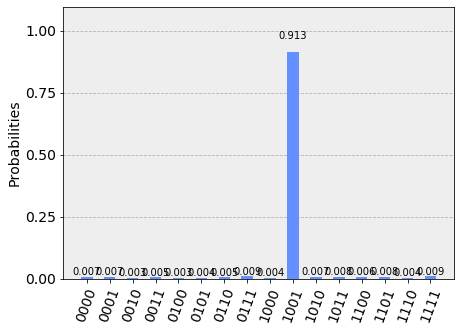

In [58]:
# Run the program
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend=backend, shots=1024)
st = job.result().get_counts()
plot_histogram(st)


In [92]:
state = QuantumRegister(4)
stateb = ClassicalRegister(4) # bits for states measurements
ancilla = QuantumRegister(1)  # auxiliary variable
tmp = QuantumRegister(2)  # for the apmplification mct gate
circ = QuantumCircuit()
circ.add_register(state, stateb, ancilla, tmp)

# 1. step - Prepartion
circ.x(ancilla)  # X on ancilla qbit
# uniqe values under uniqie adresses
# addr 00 val 01 |0001>
# addr 01 val 10 |0100>
# addr 10 val 11 |1011>
# addr 11 val 01 |1101>
alpha = 0.5
circ.initialize([0, alpha, 0, 0,
                alpha , 0, 0 , 0,
                0 , 0, 0 , alpha,
                0 , alpha, 0 , 0,
                ], state)
# circ.h(state) # Put the state qubits into superpostion of states
circ.barrier() # added for circuit readability
# Iteration:

for i in range(2): # Only one iteration for this example is enough, more iteration will destroy the solution
    # 2. apply Oracle search for value 11
#     circ.x(state[3]) 
#     circ.x(state[2])
#     circ.x(state[1])
    # store result in ancilla
    circ.h(ancilla)
    circ.mct([state[0], state[1], state[2], state[3]], ancilla[0], tmp, mode = 'basic')
    circ.h(ancilla)
    circ.barrier() # added for circuit readability

    # 3. Revert all operation from the oracle, that modified other qubits  (revers order)
#     circ.x(state[1])    
#     circ.x(state[2])
#     circ.x(state[3]) 
   
    circ.barrier() # added for circuit readability

    # 4. Amplify the amplitude
    # inversion_about_average
    circ.h(state)
    circ.x(state)

    circ.h(state[3])
    circ.mct([state[0], state[1], state[2]], state[3], tmp)
    circ.h(state[3])

    circ.x(state)
    circ.h(state)
    circ.barrier() # added for circuit readability

circ.measure(state, stateb)
# circ.draw(output='mpl')


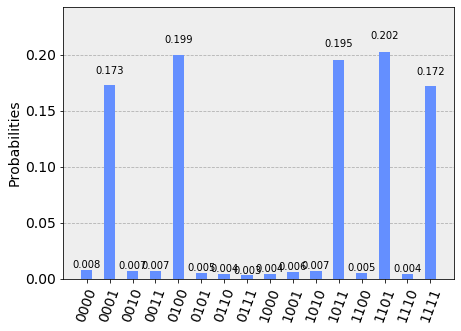

In [93]:
# Run the program
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend=backend, shots=1024)
st = job.result().get_counts()
plot_histogram(st)

[1](http://localhost:8889/notebooks/algorithms/grover_algorithm.ipynb)
[2](http://dkopczyk.quantee.co.uk/grover-search/)
[3](https://quantumcomputing.stackexchange.com/questions/6325/grover-algorithm-for-a-database-search-where-is-the-quantum-advantage)
[4](https://www.quantiki.org/wiki/grovers-search-algorithm)

## Questions

1. **Does this algo can find more than only one solution?**
2. Why more iteration destory the output?